In [29]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
#loading data into dataframe and setting ensembl_ids as index
df = pd.read_csv('data/GSE178491_KD.csv.zip', index_col=0)
#setting index as genenames, cleaning dataframe
df = df.dropna(subset='genename').drop_duplicates(subset='genename')
df = df.set_index('genename')
df = df[df.sum(axis=1) > 0] #eliminating all genes in which the sum across ALL patients is 0
df

,KD1,KD2,KD3,KD4,KD5,KD6,KD7,KD8,KD9,KD10,...,control21,control22,control23,control24,control25,control26,control27,control28,control29,control30
genename,,,,,,,,,,,,,,,,,,,,,
TSPAN6,34.096,110.867,115.952,46.001,78.799,50.442,67.936,119.207,52.491,103.899,...,101.013,77.324,52.875,64.080,44.872,11.007,54.490,54.658,58.676,101.360
TNMD,0.000,2.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
DPM1,399.999,287.703,309.039,167.999,168.000,696.000,250.999,193.991,245.000,527.000,...,450.579,239.047,704.000,450.001,586.970,25.000,225.271,242.000,403.965,167.999
SCYL3,902.864,1008.757,976.890,765.908,998.315,1392.274,884.048,774.200,702.206,1413.996,...,1029.517,1134.733,787.800,900.372,884.850,114.680,932.026,654.847,1185.912,758.495
C1orf112,214.298,249.066,259.163,163.136,379.572,327.779,311.230,219.585,142.250,235.404,...,327.464,286.597,337.609,298.235,463.947,26.574,464.826,205.284,328.906,208.428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LOC105369576,1.002,3.001,1.451,0.000,1.004,0.000,0.000,3.172,0.000,5.102,...,0.000,0.000,1.002,0.000,0.000,0.000,0.000,1.094,0.000,0.000
LOC105370224,1.000,4.004,2.000,0.000,0.000,1.000,1.000,2.000,0.000,13.000,...,1.000,0.000,1.000,0.000,3.024,0.000,0.000,2.000,1.000,1.000
LOC105377224,23.000,46.258,64.002,9.294,67.743,18.000,13.003,30.070,23.000,41.778,...,71.329,63.385,10.011,19.976,32.073,12.007,25.182,40.000,13.785,19.048


we can see that the number of rows is already greatly reduced by applying these simple data cleaning steps

now we will proceed to scale the data to standardize the variance. 

This will improve the downstream PCA analysis that will further reduce the dimensionality of the dataset.

In [3]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df.T).T, index=df.index, columns=df.columns)
scaled_data.head(3)

,KD1,KD2,KD3,KD4,KD5,KD6,KD7,KD8,KD9,KD10,...,control21,control22,control23,control24,control25,control26,control27,control28,control29,control30
genename,,,,,,,,,,,,,,,,,,,,,
TSPAN6,-0.691574,1.387196,1.524885,-0.369216,0.518873,-0.248965,0.224730,1.613023,-0.193483,1.198520,...,1.120374,0.478934,-0.183085,0.120319,-0.399787,-1.316768,-0.139355,-0.134806,-0.026008,1.129770
TNMD,-0.259759,4.123681,-0.259759,-0.259759,-0.259759,-0.259759,-0.259759,4.123681,-0.259759,1.931961,...,-0.259759,-0.259759,-0.259759,-0.259759,-0.259759,-0.259759,-0.259759,-0.259759,-0.259759,-0.259759
DPM1,0.277940,-0.287023,-0.179682,-0.889256,-0.889251,1.767125,-0.471682,-0.758490,-0.501863,0.916884,...,0.532408,-0.531812,1.807373,0.529500,1.218594,-1.608686,-0.601120,-0.516956,0.297893,-0.889256


In [4]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data.T)

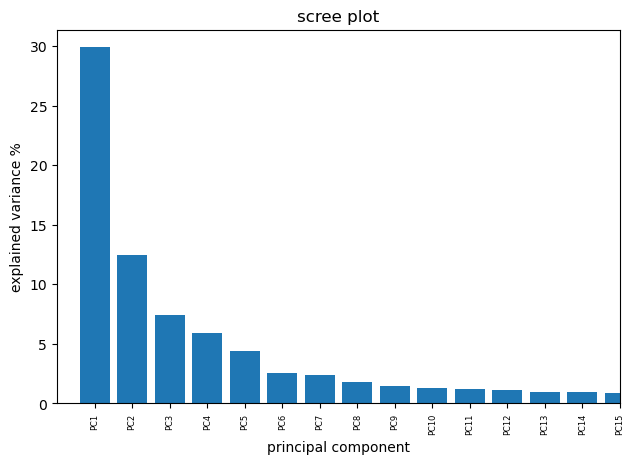

In [ ]:
#calculate the percentage of variation that each principal components accounts for
per_var = np.round(pca.explained_variance_ratio_*100, decimals=2)
#create labels for the scre plot, one per principal component
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('explained variance %')
plt.xlabel('principal component')
plt.title('scree plot')
plt.xticks(rotation=45, fontsize=6)
plt.tick_params(axis='x', rotation=90) 
plt.tight_layout()
plt.xlim(0,15)
plt.show()

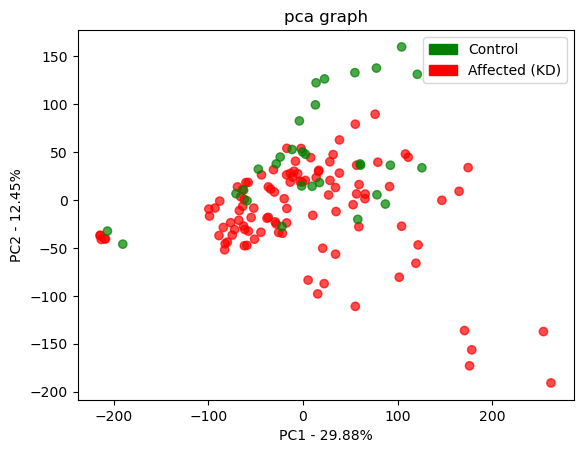

In [6]:
#pca graph
pca_df = pd.DataFrame(pca_data, index=df.columns, columns=labels) #rows=samples, columns=PCs

#assigning all control sampples to green and kd samples to red for better plotting
condition_labels = ['control' if 'KD' not in str(sample) else 'affected' for sample in df.columns]
colors = ['green' if condition == 'control' else 'red' for condition in condition_labels]

plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, c=colors)
plt.title('pca graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
#legend
control_patch = mpatches.Patch(color='green', label='Control')
affected_patch = mpatches.Patch(color='red', label='Affected (KD)')
plt.legend(handles=[control_patch, affected_patch])
plt.show()

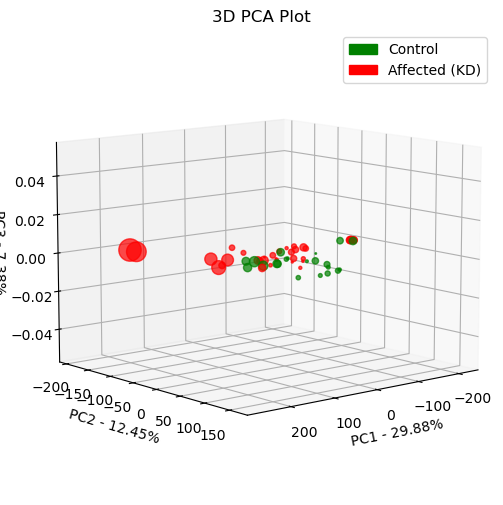

In [102]:
#3D pca graph

fig = plt.figure(figsize=(6,8))
ax = plt.axes(projection='3d')
plt.scatter(pca_df['PC1'], pca_df['PC2'],pca_df['PC3'], alpha=0.7, c=colors)
plt.title('3D PCA Plot')
ax.set_xlabel('PC1 - {0}%'.format(per_var[0]))
ax.set_ylabel('PC2 - {0}%'.format(per_var[1]))
ax.set_zlabel('PC3 - {0}%'.format(per_var[2]))

# Adjust the view angle to ensure all axes are visible
ax.view_init(elev=10, azim=50) 

#legend
control_patch = mpatches.Patch(color='green', label='Control')
affected_patch = mpatches.Patch(color='red', label='Affected (KD)')
plt.legend(handles=[control_patch, affected_patch])

plt.show()

loading scores give information about how much each original variable contributes to the principal component in consideration 

in our context each loading score is the contribution of a gene to the principal component, a high loading score means that the gene strongly contributes to the variation. Loading scores can be positive (meaning they increase as the PC increases) or negative (vice-versa); either way the sign does not concern us as we are only interested in the absolute value. 

In [20]:
#looking at loading scores for PC1 for determining which genes have the most influence in separating the clusters along x-axis
loading_sc = pd.Series(pca.components_[0], index=df.index)
sort_loading_sc = loading_sc.abs().sort_values(ascending=False) #sorte by absolute value
top10_PC1= sort_loading_sc.head(10)

selected_genes = top10_PC1.index.tolist()
print(selected_genes)

['ZNF562', 'ZBTB43', 'CSNK2A1', 'DLST', 'PIGN', 'MED17', 'NEK4', 'LTO1', 'TM7SF3', 'TTL']


after we effectively recognized the genes that explain the most variance of the Principal Component 1 we put them into a list that will be used as a mask on our original dataframe to select only those genes 

we also will need to create a new column which will represent the presence or absence of the kawasaki disease: '1' will mean that the sample belongs to the KD group, 0 will mean that the sample belongs to the Control group

PS: I've tried to build a list of selected genes using different combinations of both genes of PC1 and of PC2. Unfortunately none of the tries were able to produce a better result accuracy wise than my original attempt with just the 10 most impactful genes of PC1. Therefore for the sake of simplicity I'm just keeping the first solution. 

In [ ]:
#applying the filter to the original dataframe 
reduced_df = df.T[selected_genes]
df.index.name = 'sample'

#assigning the 1/0 to mark the presence/absence of the disease
for sample in reduced_df.index:
    if 'KD' in str(sample):
        reduced_df.loc[sample, 'condition'] = 1  # Set 1 for KD group
    else: 
        reduced_df.loc[sample, 'condition'] = 0  # Set 0 for control group

reduced_df

sample,ZNF562,ZBTB43,CSNK2A1,DLST,PIGN,MED17,NEK4,LTO1,TM7SF3,TTL,condition
KD1,807.070,480.739,2026.445,621.572,1762.506,1090.527,526.093,315.596,657.992,376.656,1.0
KD2,1492.253,883.952,3411.122,1289.571,2961.667,1688.858,907.235,535.562,1046.774,972.223,1.0
KD3,1389.609,711.597,3050.563,873.494,3072.494,1402.569,697.550,398.899,1206.885,660.712,1.0
KD4,672.183,461.303,1493.609,459.382,1481.500,1048.752,371.827,291.826,614.531,346.406,1.0
KD5,1459.663,797.706,2880.915,1080.727,3675.819,1506.225,659.405,717.802,882.986,869.112,1.0
...,...,...,...,...,...,...,...,...,...,...,...
control26,150.526,90.889,293.705,103.876,443.017,159.622,83.204,81.689,87.658,100.375,0.0
control27,1384.025,755.060,2737.940,1077.822,3356.850,1405.844,666.634,546.454,860.718,728.137,0.0
control28,772.873,415.917,1598.328,479.622,1683.003,1023.281,409.273,320.971,585.227,424.141,0.0
control29,947.711,524.689,2258.336,677.218,2062.843,1452.485,480.429,401.612,772.640,544.181,0.0


### test/train split and training the model

I specifically chose logistic regression because it's intended for binary classification, for example in our case it will predict wether an individual has the disease or not. 

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

train, test = train_test_split(reduced_df, test_size=0.3, random_state=42) #props if you get the reference
trainX = train[selected_genes]
trainY = train['condition']
testX = test[selected_genes]
testY = test['condition']

LR = LogisticRegression(max_iter= 1000, solver='lbfgs').fit(trainX, trainY)

predY = LR.predict(testX)
predY

array([0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1.])

### evaluation of the model 

we now want to know how good our logistic regression model is at predicting kawasaki disease, namely the confusion matrix and the accuracy score which is directly derived from that. 

on the diagola of the confusion matrix we can find the number of times our model made a right guess (i.e. the True Positives and True Negatives), meanwhile the other values in the matrix represent those guesses in which the model failed to be correct. 

the accuracy score can be direcly derived from the confusion matrix by dividing the sum of the values on the diagonal for the sum all the values in the matrix 

In [112]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#checking accuracy
accuracy = accuracy_score(testY, predY)
print(f'accuracy of the model : {accuracy: .2f}')
#visualizing the confusion matrix 
cm = confusion_matrix(testY, predY)
print()
print('consfusion matrix')
print(cm)


accuracy of the model :  0.78

consfusion matrix
[[ 2  7]
 [ 2 30]]
